In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import math

from src.segment import egg_contours
from src.load import load_image
from src.bound_eggs import fit_ellipses

from tqdm.notebook import tqdm

# If we are using PyCharm dark mode, the image will be inverted unless we do this
plt.style.use('dark_background')

In [10]:
species = ['Hydrobates leucorhous leucorhous',
 'Buteo jamaicensis calurus',
 'Aquila chrysaetos canadensis',
 'Falco mexicanus',
 'Rallus obsoletus obsoletus',
 'Actitis macularius',
 'Chlidonias niger surinamensis',
 'Uria aalge californica',
 'Aphelocoma californica californica',
 'Campylorhynchus brunneicapillus couesi',
 'Mimus polyglottos leucopterus',
 'Toxostoma bendirei',
 'Turdus migratorius propinquus']

In [11]:
data = pd.read_csv('./data/California_Egg_Data.csv')

In [12]:
dataset = []

In [15]:
labels = []

In [20]:
for idx, row in tqdm(data.iterrows()):
    if row["SCIENTIFIC_NAME"] in species:
        dataset.append(load_image(row["IMAGE URL"]))
        labels.append(row["SCIENTIFIC_NAME"])

0it [00:00, ?it/s]

In [22]:
contours = []

In [23]:
for img in tqdm(dataset):
    contours.append(egg_contours(img))

  0%|          | 0/815 [00:00<?, ?it/s]

In [25]:
ellipses = []

In [26]:
for contour in contours:
    ellipses.append(fit_ellipses(contour, len(contour)))

C:\Users\benja\Code\BirdEggSpecies\src\bound_eggs.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(ellipses)


In [106]:
def draw_ellipse(img: np.ndarray, ellipse):
    img_copy = img.copy()
    img_copy = cv2.ellipse(img_copy, ellipse, (0, 255, 0), 3)
    (xc,yc),(d1,d2),angle = ellipse
    rmajor = max(d1,d2)/2
    rminor = min(d1,d2)/2
    angle1 = angle
    if angle1 > 90:
        angle1 -= 90
    else:
        angle1 += 90
    xtop = xc + math.cos(math.radians(angle1))*rmajor
    ytop = yc + math.sin(math.radians(angle1))*rmajor
    xbot = xc + math.cos(math.radians(angle1+180))*rmajor
    ybot = yc + math.sin(math.radians(angle1+180))*rmajor

    xtopm = xc + math.cos(math.radians(angle))*rminor
    ytopm = yc + math.sin(math.radians(angle))*rminor
    xbotm = xc + math.cos(math.radians(angle+180))*rminor
    ybotm = yc + math.sin(math.radians(angle+180))*rminor
    img_copy = cv2.line(img_copy, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 0, 255), 3)
    img_copy = cv2.line(img_copy, (int(xtopm),int(ytopm)), (int(xbotm),int(ybotm)), (0, 0, 255), 3)
    return (img_copy, (xtop,ytop,xbot,ybot), (xtopm,ytopm,xbotm,ybotm))

In [107]:
el = fit_ellipses(contours[5], len(contours[5]))
img = dataset[5]

C:\Users\benja\Code\BirdEggSpecies\src\bound_eggs.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(ellipses)


In [109]:
t = draw_ellipse(img,el[0])

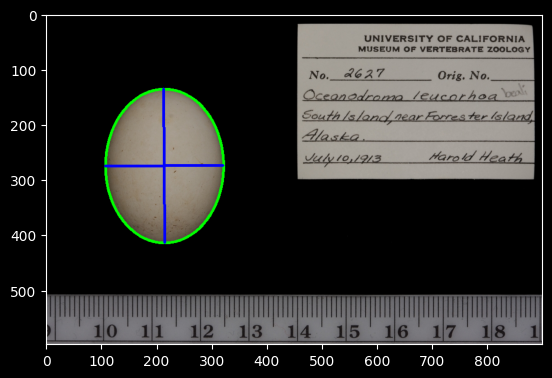

In [111]:
plt.imshow(t[0])